In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import itertools
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import sys

In [2]:
data=pd.read_csv(r"../SAMSUNG/MergeDate.csv")
data

,OrderDate,OrderQuantity,Sales,Discount,Profit
0,2014-01-06 0:00,9,2573.820000,0.000000,746.407800
1,2014-01-07 0:00,3,76.728000,0.600000,-53.709600
2,2014-01-10 0:00,1,51.940000,0.000000,21.295400
3,2014-01-11 0:00,2,9.940000,0.000000,3.081400
4,2014-01-13 0:00,9,439.969500,0.075000,45.639900
...,...,...,...,...,...
1983,2020-12-27 0:00,13,100.415000,0.400000,261.261500
1984,2020-12-28 0:00,4,73.670000,0.350000,53.037000
1985,2020-12-29 0:00,98,109.888333,0.458333,169.017833
1986,2020-12-30 0:00,68,165.201000,0.430000,154.966350


In [3]:
data.head()

,OrderDate,OrderQuantity,Sales,Discount,Profit
0,2014-01-06 0:00,9,2573.8200,0.000,746.4078
1,2014-01-07 0:00,3,76.7280,0.600,-53.7096
2,2014-01-10 0:00,1,51.9400,0.000,21.2954
3,2014-01-11 0:00,2,9.9400,0.000,3.0814
4,2014-01-13 0:00,9,439.9695,0.075,45.6399


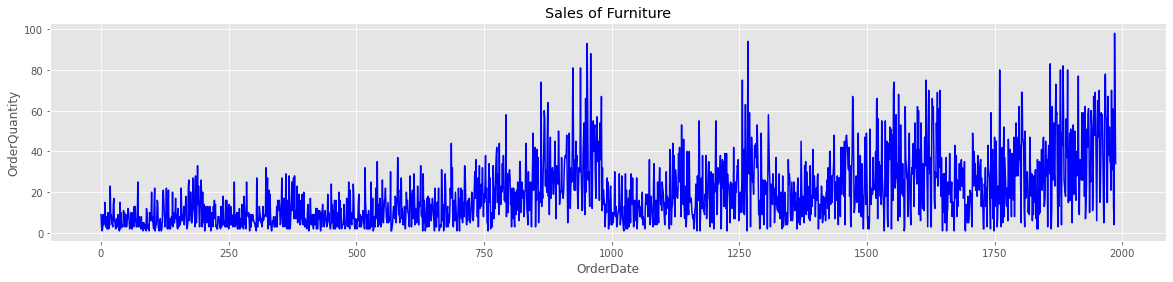

In [4]:
ax= data['OrderQuantity'].plot(color='blue',figsize=(20,4))
ax.set_xlabel("OrderDate")
ax.set_ylabel('OrderQuantity')
ax.set_title("Sales of Furniture")
plt.show()

In [7]:
data= data.groupby('OrderDate')['OrderQuantity'].sum().reset_index()

In [8]:
data = data.set_index('OrderDate')

In [11]:
data

,OrderQuantity
OrderDate,
2014-01-06 0:00,9
2014-01-07 0:00,3
2014-01-10 0:00,1
2014-01-11 0:00,2
2014-01-13 0:00,9
...,...
2020-12-27 0:00,13
2020-12-28 0:00,4
2020-12-29 0:00,98


In [12]:
df = data

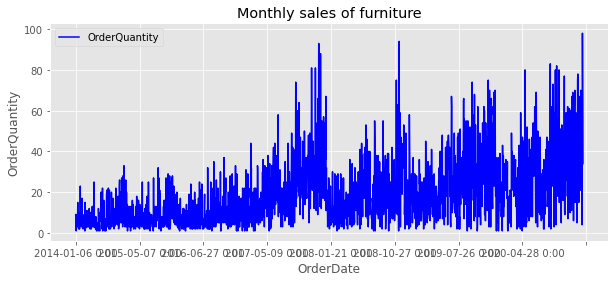

In [13]:
df.plot(figsize=(10, 4),color='blue',label = 'Furniture')

#avg_technology_sales.plot(figsize=(10, 4),color='red',label = 'Technology')

#avg_office_sales.plot(figsize=(10, 4),color='green',label = 'Office Supplies')
plt.xlabel("OrderDate")
plt.ylabel('OrderQuantity')
plt.title("Monthly sales of furniture")
plt.legend()
plt.show()

In [14]:
def test_stationarity(timeseries):
    rcParams['figure.figsize'] = 10, 6
    rolmean = timeseries.rolling(12).mean() #allows you to calculate moving avg
    rolstd = timeseries.rolling(12).std() 
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print('p-value=', dftest[1])

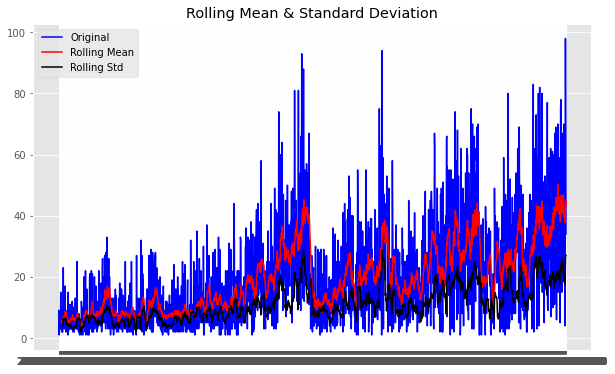

Results of Dickey-Fuller Test:
p-value= 0.2027667747837411


In [15]:
test_stationarity(df)

In [36]:
X = df
train_size = int(len(X) * 0.75)
trainset, testset= X[0:train_size], X[train_size:]

In [37]:
def performance(y_true, y_pred): 
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    performance_data= {'MSE':round(mse, 2),
                      'RMSE':round(np.sqrt(mse), 2),
                       'MAPE':round(mape, 2)
                      }
    return performance_data

def performance2(y_true, y_pred): 
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print(' The MSE of forecasts is {}'.format(round(mse, 2))+
                  '\n The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2))+
                  '\n The MAPE of forecasts is {}'.format(round(mape, 2))))

In [42]:
from statsmodels.tsa.arima_model import ARMA

model_arma = ARMA(trainset, order=(1, 1))
model_arma_fit = model_arma.fit(disp=False)
arma_predict = model_arma_fit.predict(start=1491, end=1988,
                                       dynamic=False)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\SAMSUNG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

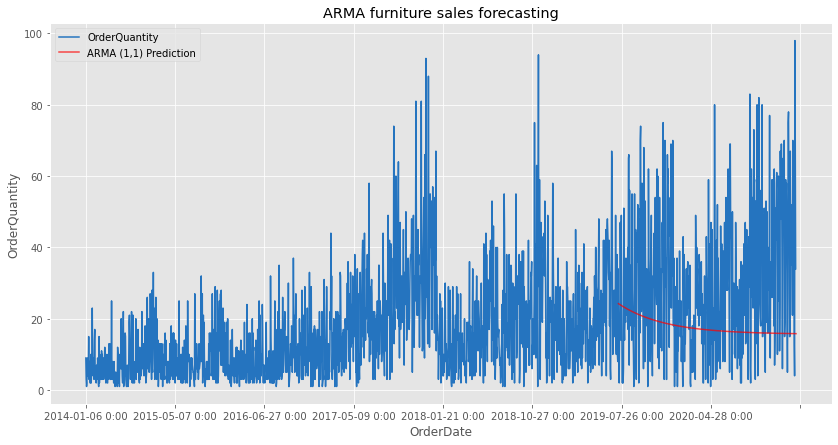

In [43]:
# One step ahead forecast
#observed plot
ax = df.plot(label='Observed',color='#2574BF')
#predicted plot
rcParams['figure.figsize'] = 14, 7
arma_predict.plot(ax=ax, label='ARMA (1,1) Prediction', alpha= 0.7, color='red') 
plt.title('ARMA furniture sales forecasting')
plt.xlabel('OrderDate')
plt.ylabel('OrderQuantity')
plt.legend()
plt.show() #ARMA

In [44]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.75)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate the combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [45]:
p_values = [0, 1, 2, 4,6]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(df.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=514.053
ARIMA(0, 0, 1) MSE=442.326
ARIMA(0, 1, 0) MSE=579.532
ARIMA(0, 1, 1) MSE=332.316
ARIMA(1, 0, 0) MSE=416.691
ARIMA(1, 0, 1) MSE=333.333
ARIMA(1, 1, 0) MSE=482.309
ARIMA(2, 0, 0) MSE=404.186
ARIMA(2, 0, 1) MSE=331.890
ARIMA(2, 1, 0) MSE=428.990
ARIMA(2, 1, 1) MSE=328.541
ARIMA(4, 0, 0) MSE=380.878
ARIMA(4, 0, 1) MSE=329.057
ARIMA(4, 1, 0) MSE=398.624
ARIMA(4, 1, 1) MSE=326.108
ARIMA(6, 0, 0) MSE=346.869
ARIMA(6, 0, 1) MSE=312.079
ARIMA(6, 1, 0) MSE=309.213
ARIMA(6, 1, 1) MSE=312.953
Best ARIMA(6, 1, 0) MSE=309.213


In [55]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(trainset, order = (6,0,0))
model_arima_fit = model_arima.fit(disp=False)
arima_predict = model_arima_fit.predict(start=1491, end=1988
                                           ,dynamic=False)

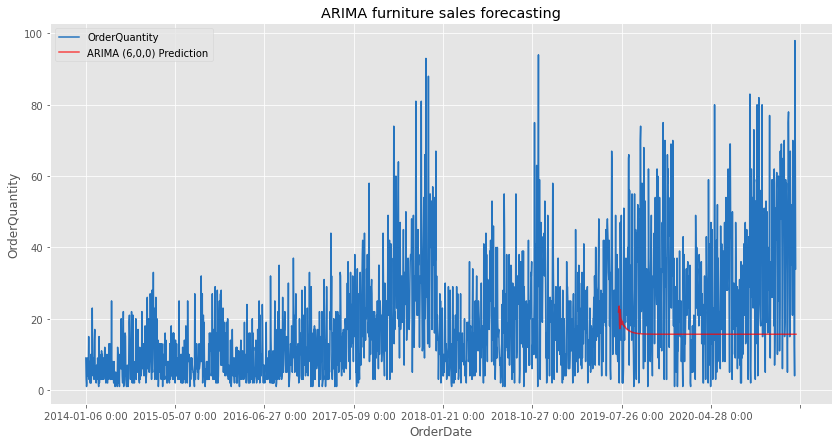

In [56]:
ax = df.plot(label='Observed',color='#2574BF')
#predicted plot
rcParams['figure.figsize'] = 14, 7
arima_predict.plot(ax=ax, label='ARIMA (6,0,0) Prediction', alpha= 0.7, color='red') 
plt.title('ARIMA furniture sales forecasting')
plt.xlabel('OrderDate')
plt.ylabel('OrderQuantity')
plt.legend()
plt.show() #ARIMA

In [57]:
#fitting model
sarima_model_1 = sm.tsa.statespace.SARIMAX(trainset,
                                order=(0, 0, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
sarima_fit_1 = sarima_model_1.fit()
print(sarima_fit_1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4532      0.018    -24.931      0.000      -0.489      -0.418
sigma2       176.7378      4.214     41.939      0.000     168.478     184.997


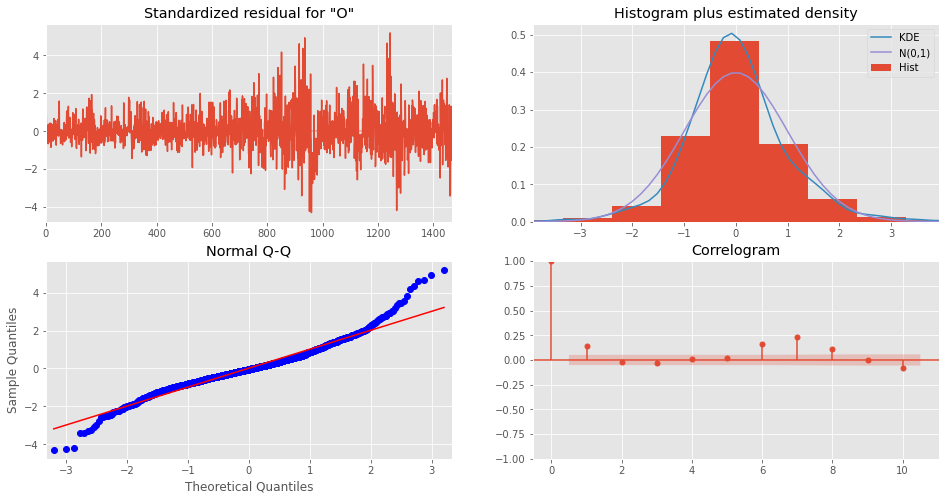

In [58]:
sarima_fit_1.plot_diagnostics(figsize=(16, 8))
plt.show()

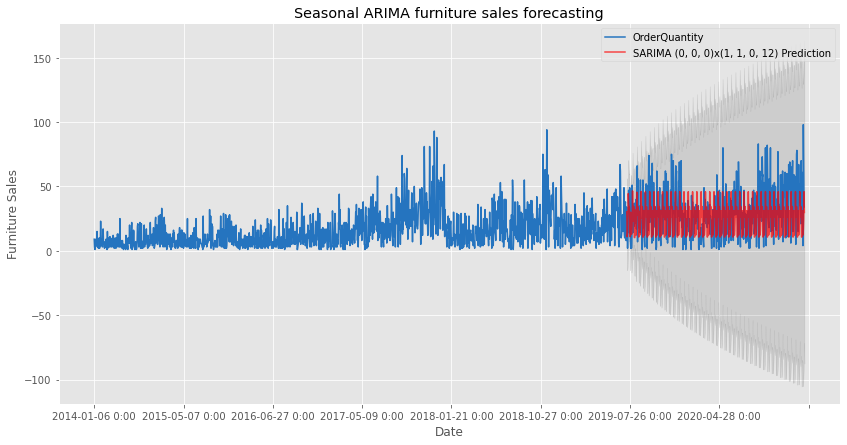

In [59]:
# One step ahead forecast
sarima_predict_1 = sarima_fit_1.get_prediction(start=1491, end=1988
                                           ,dynamic=False)
sarima_predict_conf_1 = sarima_predict_1.conf_int()
#observed plot
ax = df.plot(label='Observed',color='#2574BF')
#predicted plot
rcParams['figure.figsize'] = 14, 7
sarima_predict_1.predicted_mean.plot(ax=ax, label='SARIMA (0, 0, 0)x(1, 1, 0, 12) Prediction', alpha= 0.7, color='red') 
ax.fill_between(sarima_predict_conf_1.index,
                #lower sales
                sarima_predict_conf_1.iloc[:, 0],
                #upper sales
                sarima_predict_conf_1.iloc[:, 1], color='k', alpha=0.1)
plt.title('Seasonal ARIMA furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()